# Handling PASTTREC configurations

## Import all required libs

In [1]:
import sys  
sys.path.insert(0, '../')

import pasttrec_ctrl as pt
import pasttrec_conf as pc
board = "0x1800"

Welcome to JupyROOT 6.14/04


## Creating a new default configuration for all connected boards

### Retrieving a list of all connected boards

Next commands get a list of all connected to TRB OEPs and their data FPGA. 
> getConnectedMDCtree() - returns a dictionary, where each key correspond to OEP address, and value - to the same dictionary of its FPGAs

In [2]:
mdc_tree = pc.getConnectedMDCtree()
print(*mdc_tree.items(),sep="\n")

('0x8008', {'0x1812': {}, '0x1813': {}})
('0x8009', {'0x1814': {}, '0x1815': {}})
('0x8001', {'0x1800': {}})
('0x8011', {'0x1819': {}, '0x1818': {}})
('0x8012', {'0x1820': {}, '0x1821': {}})
('0x8010', {'0x1816': {}, '0x1817': {}})
('0x8007', {'0x1810': {}, '0x1811': {}})
('0x8006', {'0x1808': {}, '0x1809': {}})
('0x8002', {'0x1802': {}, '0x1803': {}})
('0x8005', {'0x1806': {}, '0x1807': {}})


### Create configuration structure based on retrieved tree

What does configuration mean?

It's a dictionary of OEP address - MDCTDC_OEP object pairs, that allow easy handling of all settings.

In [3]:
conf = pc.generateDefaultConfiguration(mdc_tree)
for oep in conf.values():
    print(oep)

OEP 	 |    |	        FPGA1       |	        FPGA2       |	        FPGA3       
0x8008	 | -- |			0x1812		|			0x1813		|
		 | CH |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  
		 | GA |	4.00 4.00 4.00 4.00	|	4.00 4.00 4.00 4.00	|
		 | TH |	0x08 0x08 0x08 0x08	|	0x08 0x08 0x08 0x08	|
		 | PT |	0010 0010 0010 0010	|	0010 0010 0010 0010	|
		 | B0 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B1 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B2 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B3 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B4 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B5 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B6 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B7 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
OEP 	 |    |	        FPGA1       |	        FPGA2       |	        FPGA3       
0x8009	 | -- |			0x1814		|			0x1815		|
		 | CH |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  
		 | GA |	4.00 4.00 4.

## Navigation

### Through OEPs

To retrieve MDCTDC_OEP object for OEP with the given address, it's enough to just use this address as a key:

In [4]:
print(conf["0x8001"])

OEP 	 |    |	        FPGA1       |	        FPGA2       |	        FPGA3       
0x8001	 | -- |			0x1800		|
		 | CH |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  
		 | GA |	4.00 4.00 4.00 4.00	|
		 | TH |	0x08 0x08 0x08 0x08	|
		 | PT |	0010 0010 0010 0010	|
		 | B0 |	0x0F 0x0F 0x0F 0x0F	|
		 | B1 |	0x0F 0x0F 0x0F 0x0F	|
		 | B2 |	0x0F 0x0F 0x0F 0x0F	|
		 | B3 |	0x0F 0x0F 0x0F 0x0F	|
		 | B4 |	0x0F 0x0F 0x0F 0x0F	|
		 | B5 |	0x0F 0x0F 0x0F 0x0F	|
		 | B6 |	0x0F 0x0F 0x0F 0x0F	|
		 | B7 |	0x0F 0x0F 0x0F 0x0F	|


### Through FPGAs and PASTTREC

The same key access is available for every FPGA

In [5]:
print(conf["0x8001"][board])

FPGA 0x1800
	PASTTREC 0: gain: 4, pt: 10, thr: 8, baselines: [15, 15, 15, 15, 15, 15, 15, 15]
	PASTTREC 1: gain: 4, pt: 10, thr: 8, baselines: [15, 15, 15, 15, 15, 15, 15, 15]
	PASTTREC 2: gain: 4, pt: 10, thr: 8, baselines: [15, 15, 15, 15, 15, 15, 15, 15]
	PASTTREC 3: gain: 4, pt: 10, thr: 8, baselines: [15, 15, 15, 15, 15, 15, 15, 15]



.. and PASTTREC

In [6]:
print(conf["0x8001"][board][1])

gain: 4, pt: 10, thr: 8, baselines: [15, 15, 15, 15, 15, 15, 15, 15]


## Changing settings

### Manual mode

To change any setting the corresponding setter should be used:

In [7]:
print(conf["0x8001"][board][1])
conf["0x8001"][board][1].setGain(1) 
conf["0x8001"][board][1].setPt(15) 
print(conf["0x8001"][board][1])

gain: 4, pt: 10, thr: 8, baselines: [15, 15, 15, 15, 15, 15, 15, 15]
gain: 1, pt: 15, thr: 8, baselines: [15, 15, 15, 15, 15, 15, 15, 15]


### Automatic baseline finder for specific TDC

In [8]:
conf["0x8001"][board].found_baseline(scanning_time = 0.2)
print(conf["0x8001"][board])

FPGA 0x1800
	PASTTREC 0: gain: 4, pt: 10, thr: 8, baselines: [21, 16, 16, 18, 18, 23, 16, 21]
	PASTTREC 1: gain: 1, pt: 15, thr: 8, baselines: [18, 18, 17, 16, 17, 14, 14, 22]
	PASTTREC 2: gain: 4, pt: 10, thr: 8, baselines: [20, 22, 21, 15, 15, 18, 19, 23]
	PASTTREC 3: gain: 4, pt: 10, thr: 8, baselines: [17, 20, 18, 14, 21, 23, 20, 23]



### Automatic baseline finder for all TDC

OEP 	 |    |	        FPGA1       |	        FPGA2       |	        FPGA3       
0x8001	 | -- |			0x1800		|
		 | CH |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  
		 | GA |	4.00 1.00 4.00 4.00	|
		 | TH |	0x08 0x08 0x08 0x08	|
		 | PT |	0010 0015 0010 0010	|
		 | B0 |	0x15 0x12 0x14 0x10	|
		 | B1 |	0x10 0x12 0x16 0x14	|
		 | B2 |	0x10 0x11 0x15 0x12	|
		 | B3 |	0x12 0x10 0x0F 0x0E	|
		 | B4 |	0x12 0x11 0x0F 0x15	|
		 | B5 |	0x17 0x0E 0x12 0x17	|
		 | B6 |	0x10 0x0E 0x13 0x15	|
		 | B7 |	0x15 0x16 0x17 0x17	|
OEP 	 |    |	        FPGA1       |	        FPGA2       |	        FPGA3       
0x8009	 | -- |			0x1814		|			0x1815		|
		 | CH |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  
		 | GA |	4.00 4.00 4.00 4.00	|	4.00 4.00 4.00 4.00	|
		 | TH |	0x08 0x08 0x08 0x08	|	0x08 0x08 0x08 0x08	|
		 | PT |	0010 0010 0010 0010	|	0010 0010 0010 0010	|
		 | B0 |	0x14 0x14 0x14 0x13	|	0x16 0x18 0x12 0x18	|
		 | B1 |	0x15 0x1A 0x13 0x1C	|	0x17 0x14 0x15 0x16	|
		 | B

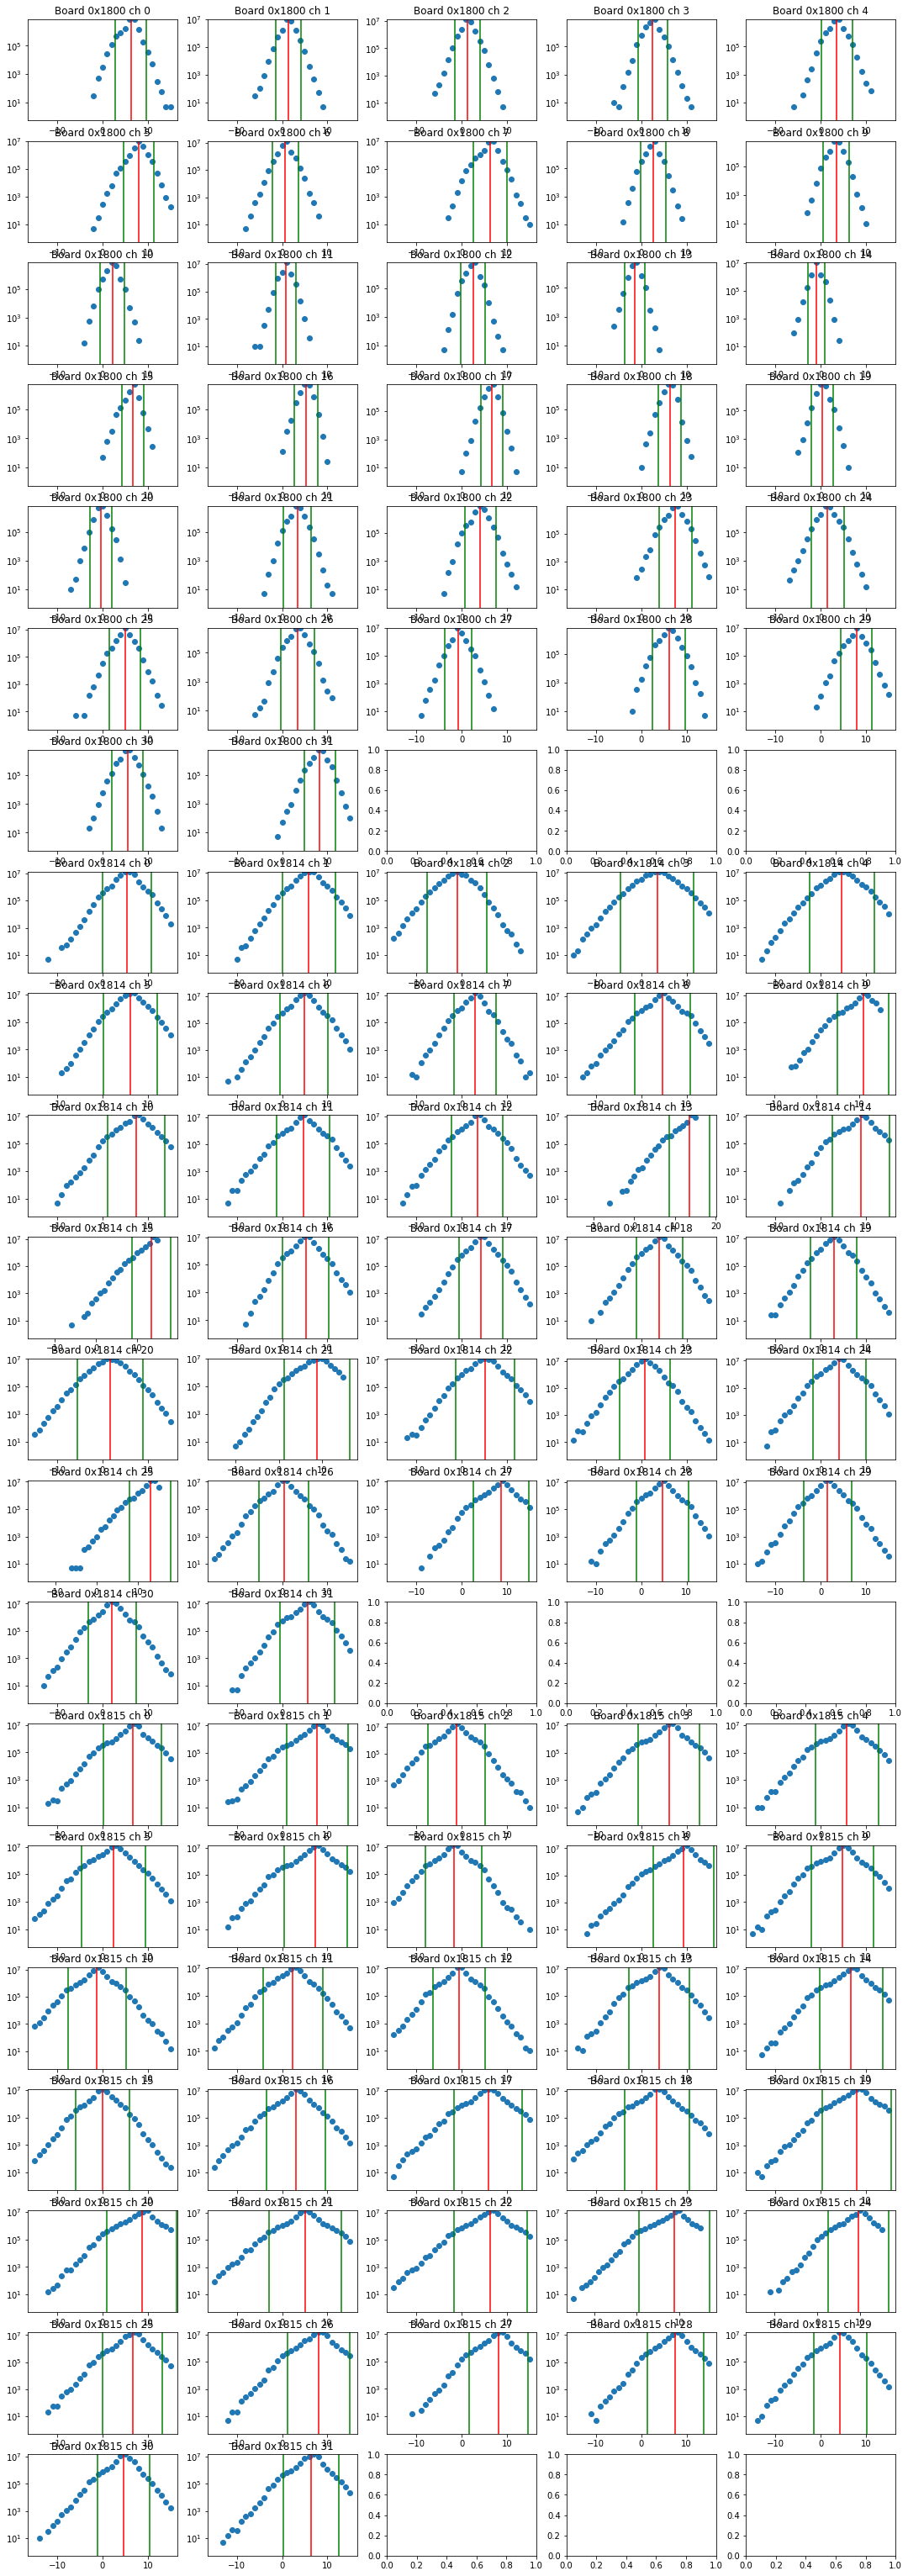

In [9]:
conf_baseline = {"0x8001": conf["0x8001"], "0x8009": conf["0x8009"] }
pc.found_all_baselines(conf_baseline, plot=True)
print(*conf_baseline.values(),sep="\n")

## Save & load configurations

To save configurations to file:

In [10]:
pc.writeConfigurationToFile(file="mytestconf.conf", conf=conf)

To load it from the file:

In [11]:
conf2 = pc.readConfigurationFromFile("mytestconf.conf")
print(*conf2.values(), sep="\n")

OEP 	 |    |	        FPGA1       |	        FPGA2       |	        FPGA3       
0x8008	 | -- |			0x1812		|			0x1813		|
		 | CH |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  
		 | GA |	4.00 4.00 4.00 4.00	|	4.00 4.00 4.00 4.00	|
		 | TH |	0x08 0x08 0x08 0x08	|	0x08 0x08 0x08 0x08	|
		 | PT |	0010 0010 0010 0010	|	0010 0010 0010 0010	|
		 | B0 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B1 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B2 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B3 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B4 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B5 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B6 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
		 | B7 |	0x0F 0x0F 0x0F 0x0F	|	0x0F 0x0F 0x0F 0x0F	|
OEP 	 |    |	        FPGA1       |	        FPGA2       |	        FPGA3       
0x8009	 | -- |			0x1814		|			0x1815		|
		 | CH |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  |	PT1  PT2  PT3  PT4  
		 | GA |	4.00 4.00 4.

## Upload configurations to FPGA flash (under testing)

First of all, it's required to create an image structure of configuration on the file system. 

### Create an image in folder mytestimage

In [12]:
pc.createImage(conf=conf, path="mytestimage")

This command creates the next file structure:
* mytestimage
    * 0x8001    - *oep*
        * 0x1801.hex  - *fpga*
        * 0x1800.hex
    * 0x8002
    * 0x8005
    ...
    
And inside each hex file there is a simple list of SC commands:
> 0xA0FF 0xFFFFFFFF <br>
> 0xA010 0x00050010<br>
> 0xA011 0x0005011E<br>
> 0xA012 0x0005022A<br>
> 0xA013 0x00050308<br>
> 0xA014 0x00050D05<br>
> ...

### Upload image to FPGA  (under testing)

In [13]:
pc.uploadImage(path="mytestimage", flash_settings="./flash_settings.pl -y", TDCs=["0x1800","0x1814","0x1815"])
pt.reset_boards(["0x1800","0x1814"])

Running:  ./flash_settings.pl -y 0x1814 /workdir/python_modules/past_conf_vova/mytestimage/0x8009/0x1814.hex
Running:  ./flash_settings.pl -y 0x1815 /workdir/python_modules/past_conf_vova/mytestimage/0x8009/0x1815.hex
Running:  ./flash_settings.pl -y 0x1800 /workdir/python_modules/past_conf_vova/mytestimage/0x8001/0x1800.hex
Programming Endpoint(s) @ Address 0x1814
Symbols:
  E: Erasing
  P: Programming
  @: Success
  .: Skipped

Block: 0 1 2 3 4 5 6 7 8 9 A B C D E F
0      . . . . . . . . . . . . . . . . 
1      . . . . . . . . . . . . . . . . 
2      . . . . . . . . . . . . . . . . 
3      @ . . . . . . . . . . . . . . . 

Success

page 0/2 verified
page 1/2 verified
page 2/2 verified
Programming Endpoint(s) @ Address 0x1815
Symbols:
  E: Erasing
  P: Programming
  @: Success
  .: Skipped

Block: 0 1 2 3 4 5 6 7 8 9 A B C D E F
0      . . . . . . . . . . . . . . . . 
1      . . . . . . . . . . . . . . . . 
2      . . . . . . . . . . . . . . . . 
3      @ . . . . . . . . . . . . . . 

Found 1 Endpoint(s) of group MDC TDC
Start programming ImageFile '/tmp/tmp.WUTnROpj0q'
Found 1 Endpoint(s) of group MDC TDC
Start programming ImageFile '/tmp/tmp.en7p8sCzov'
Found 1 Endpoint(s) of group MDC TDC
Start programming ImageFile '/tmp/tmp.Mv9zUdzww6'


# PASTTREC handling

## Slow control reset
To reset only PASTTREC SPI module without interruption anything else:

In [14]:
pt.reset_board(board)

## Set threshold for specific PASTTREC
Pasttrec IDs: [0 1 2 3]

In [15]:
pt.set_threshold_for_pasttrec(TDC=board, PAST=1, THR=0x00)

## Set threshold for board
Parameter conn is not used - only for compatibility with old tools. Can be anything

In [16]:
pt.set_threshold_for_board(TDC=board,conn=-1,thresh=0)

## A baseline for the specific channel
Baseline range: -15:15

In [17]:
pt.set_baseline(board,9,-13)

## A baseline for the range of channels

In [18]:
pt.set_all_baselines(TDC=board, channels=[1,2,3,5],values=[-15,0,15,13])

## Find all baselines for a board with noise method

{0: {'mean': 6.239279483076034, 'rms': 1.1372467644322264},
 1: {'mean': 1.4622191474071633, 'rms': 0.944247734275564},
 2: {'mean': 1.3755585563279493, 'rms': 0.9467328558788942},
 3: {'mean': 2.545118426260748, 'rms': 1.0736588632764288},
 4: {'mean': 3.5231053958382232, 'rms': 1.1298386684336312},
 5: {'mean': 8.051012124485574, 'rms': 1.121044929987685},
 6: {'mean': 0.7228328331253684, 'rms': 1.009518093155994},
 7: {'mean': 6.280075203215341, 'rms': 1.2292757018750782},
 8: {'mean': 2.6528667789181206, 'rms': 0.9060189645717583},
 9: {'mean': 3.4249057590442087, 'rms': 0.9731238608645226},
 10: {'mean': 2.1863538156653974, 'rms': 0.8614041069487264},
 11: {'mean': 0.9070229248166618, 'rms': 0.7806897021735782},
 12: {'mean': 2.4961680956636814, 'rms': 0.9034990267529927},
 13: {'mean': -1.4474344940954327, 'rms': 0.768052735181518},
 14: {'mean': -0.968350074565492, 'rms': 0.658156296539993},
 15: {'mean': 6.650720776057442, 'rms': 0.8628078704458246},
 16: {'mean': 5.33532609633

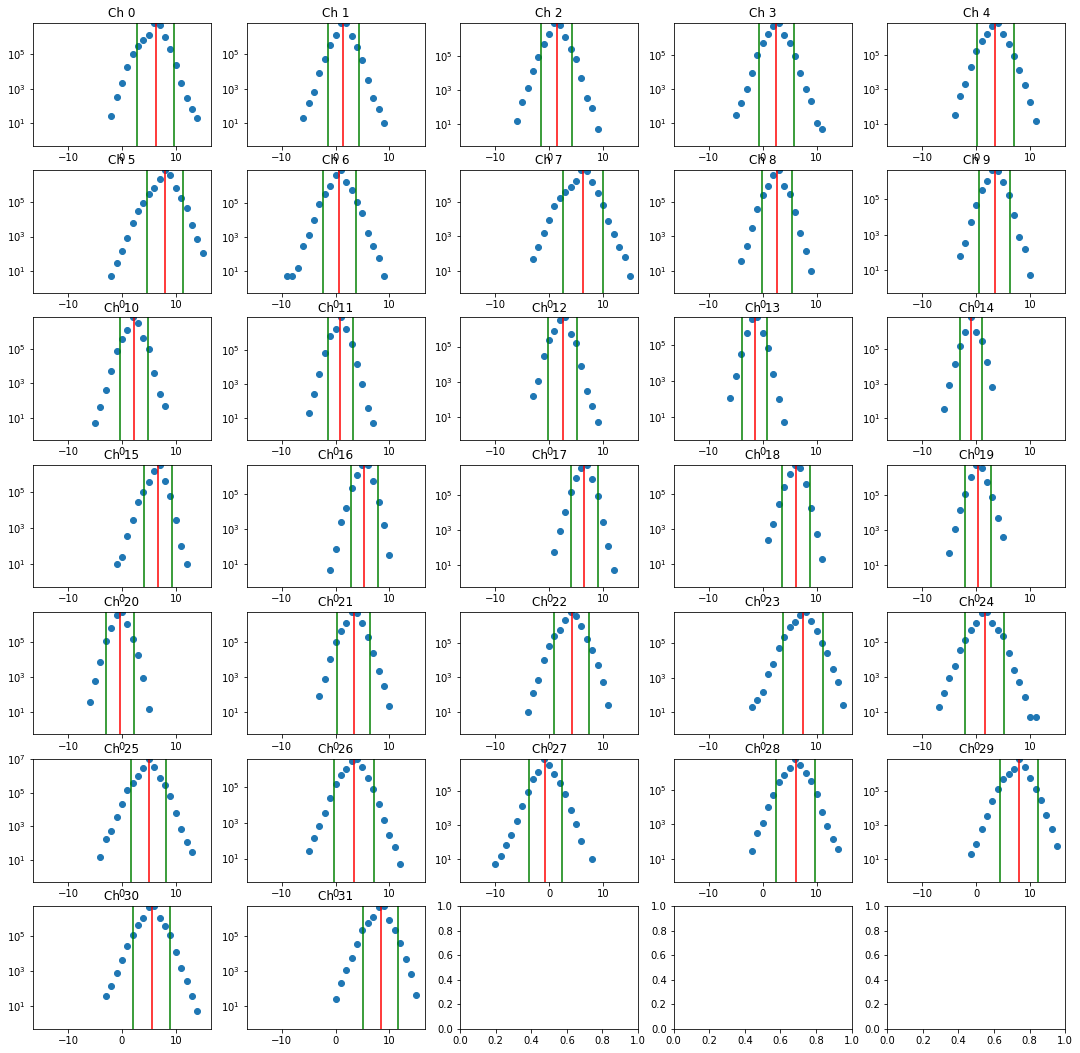

In [19]:
pt.found_baselines_for_board(board=board,scaning_time=0.2,channels=range(32), plot=True)

In [21]:
pt.reset_boards(["0x1800","0x1814", "0x1815"])
pt.set_threshold_for_boards(["0x1800","0x1814", "0x1815"], 0)